In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r'heart.csv')

In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

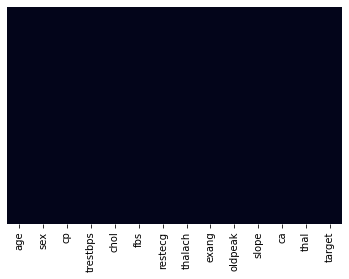

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 13].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=42)

In [ ]:
x_train

array([[42.,  1.,  1., ...,  2.,  0.,  2.],
       [58.,  1.,  0., ...,  2.,  0.,  3.],
       [46.,  1.,  2., ...,  1.,  0.,  2.],
       ...,
       [69.,  1.,  3., ...,  1.,  1.,  2.],
       [46.,  1.,  0., ...,  2.,  0.,  3.],
       [63.,  0.,  1., ...,  2.,  2.,  2.]])

In [ ]:
#x_test

In [ ]:
# Preprocessing

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors = 5)
# classifier.fit(x_train, y_train)

In [ ]:
#y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
#classifier = DecisionTreeClassifier(random_state=42)
#model = RandomForestRegressor()
#model.fit(housing_num_tr, housing_labels)
classifier = KNeighborsClassifier(n_neighbors = 20)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [ ]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#print(classification_report(y_test, y_pred))
print("Accuracy=",accuracy_score(y_test, y_pred)*100,"%")

Accuracy= 90.1639344262295 %


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[26  3]
 [ 3 29]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [ ]:
import pickle
filename = 'classifier.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.09836065573770492
Mean Squared Error: 0.09836065573770492
Root Mean Squared Error: 0.31362502409359


In [ ]:
prob=classifier.predict([[63,	1,	3	,145,	233,	1	,0,	150	,0,	2.3	,0,	0,	1	]])
prob1=classifier.predict([[37,1	,2	,130	,250,	0	,1,	187,	0	,3.5,	0	,0,	2]])
prob


array([1])

In [ ]:
prob1

array([1])

In [ ]:
prob2=classifier.predict([[57,	0	,1,	130	,236,	0	,0	,174	,0	,0.0,	1	,1,	2]])
prob2

array([1])